In [1]:
import pandas as pd
import numpy as np

In [2]:
# !pip install openpyxl
# !pip install kaggle

In [11]:
def display_df(df, rows=pd.options.display.max_rows, cols=pd.options.display.max_columns):
    """Displays n rows and cols from df"""
    with pd.option_context("display.max_rows", rows,
                           "display.max_columns", cols):
        display(df)

> ##### Linear regression

In [13]:
# Load all zip code in California
california = pd.ExcelFile('Data/California_DemographicsByZipCode_Sample.xlsx')

# Transform the data into a DataFrame
df_california_zipcode = california.parse()
df_california_zipcode.head()

,GEO_ID,State,County,City,Population Year,Population,Population Density,Land Area (sq mi),Median Household Income,Households,...,Occupied,Owner-Occupied,Renter-Occupied,Median Value of Owner-Occupied Units,Families,Married Couple Families,Married With Own Children Under 18 Years,Single Parent Families,Single Parent With Own Children Under 18 Years,Non-families
0,90001,California,Los Angeles,Los Angeles,2022,57652,17577.0,3.280,57698.0,13597.0,...,13597.0,4736.0,8861.0,487800.0,11376.0,6261.0,3342.0,5115.0,2278.0,2221.0
1,90002,California,Los Angeles,Los Angeles,2022,53108,17744.0,2.993,54221.0,13013.0,...,13013.0,5314.0,7699.0,462400.0,10575.0,4713.0,2253.0,5862.0,2689.0,2438.0
2,90003,California,Los Angeles,Los Angeles,2022,75024,20696.0,3.625,51275.0,17936.0,...,17936.0,4845.0,13091.0,494600.0,14545.0,6633.0,3613.0,7912.0,4054.0,3391.0
3,90004,California,Los Angeles,Los Angeles,2022,58833,19283.0,3.051,58420.0,23047.0,...,23047.0,3794.0,19253.0,1289600.0,12161.0,7719.0,3331.0,4442.0,1701.0,10886.0
4,90005,California,Los Angeles,Los Angeles,2022,37754,31995.0,1.180,49226.0,16607.0,...,16607.0,1301.0,15306.0,1020300.0,7790.0,4797.0,1693.0,2993.0,1233.0,8817.0


In [4]:
# Get the list of all zip codes in California
zipcodes = list(df_california_zipcode['GEO_ID'])

In [15]:
# # Load the USA real estate data from the Kaggle dataset
# !kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

In [6]:
# Read the USA real estate data from zip
df_real_estate = pd.read_csv('Data/usa-real-estate-dataset.zip')
df_real_estate.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [7]:
df_real_estate_California = df_real_estate[df_real_estate['zip_code'].isin(zipcodes)]
print(df_real_estate_California.shape)
df_real_estate_California.head()

(227023, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
33221,74251.0,for_sale,425000.0,2.0,1.0,1.40,131777.0,Eden,Vermont,95652.0,648.0,NaN
295598,8781.0,for_sale,11500.0,NaN,NaN,1.26,716475.0,Lawndale,North Carolina,90260.0,NaN,NaN
1091212,67390.0,for_sale,60000.0,NaN,NaN,0.25,1822509.0,Crystal Beach,Texas,93401.0,NaN,NaN
1154530,17458.0,for_sale,199000.0,NaN,NaN,5.10,2937.0,Milford,California,96121.0,NaN,NaN
1154535,17458.0,for_sale,2595000.0,NaN,NaN,901.00,1983508.0,Amador City,California,95651.0,NaN,NaN


In [8]:
# drop nan values
df_real_estate_California = df_real_estate_California.dropna()
print(df_real_estate_California.shape)
df_real_estate_California.head()

(157669, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
1208998,4311.0,for_sale,172999.0,3.0,2.0,0.16,987585.0,Blythe,California,92225.0,1132.0,1984-06-29
1209113,4311.0,for_sale,201000.0,2.0,2.0,0.34,761139.0,Blythe,California,92225.0,1100.0,1997-09-23
1209116,76008.0,for_sale,250000.0,7.0,3.0,0.19,1002149.0,Blythe,California,92225.0,3126.0,2015-09-23
1209118,86230.0,for_sale,325000.0,3.0,2.0,5.00,664584.0,Blythe,California,92225.0,1925.0,1985-01-14
1209120,22611.0,for_sale,287500.0,5.0,3.0,0.20,1230938.0,Blythe,California,92225.0,1642.0,2018-03-08


In [23]:
import pandas as pd
import statsmodels.formula.api as smf

df = df_real_estate_California.copy()

df_sampled = df.sample(n=5000, random_state=42)

df_sampled['status'] = df_sampled['status'].astype('category')

full_model_formula = 'price ~ brokered_by + status + bed + bath + acre_lot + street + city + state + zip_code + house_size + prev_sold_date'

full_model = smf.ols(formula=full_model_formula, data=df_sampled).fit()

print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     6.176
Date:                Wed, 29 May 2024   Prob (F-statistic):               0.00
Time:                        14:10:43   Log-Likelihood:                -75269.
No. Observations:                5000   AIC:                         1.547e+05
Df Residuals:                    2916   BIC:                         1.683e+05
Df Model:                        2083                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

Based on the summary of the linear regression model, we can see the goodness fit collected from Adjusted R-sq is 81.5%% of the variance in the price that is expleined by the model. In the other hand, we can find that 19.5% of the vairance that is not fitted to the model or explained by the model. We can also see the high F-statistic value shows a better fi to the data when using predictors than intercept-only model. Therefore, we would like to find out what model assumpotions satisfied or not statisfied. We would like to try the Q-Q plot, ACF plot, and the residuals against the fitted values to check the heteroscedasticity. 

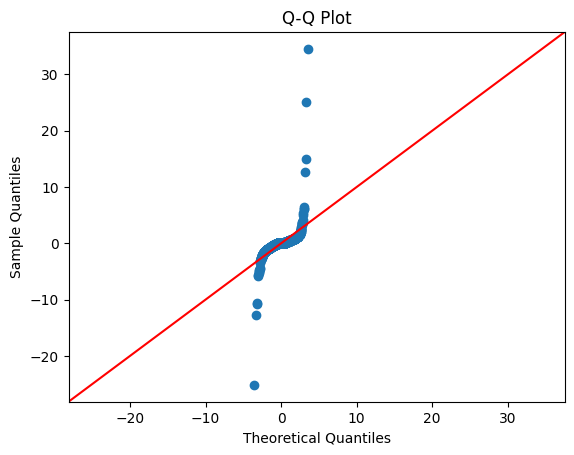

In [20]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
def standardize(x):
    return (x - x.mean()) / x.std()

residuals = standardize(full_model.resid)
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot')
plt.show()

Recalling from the Q-Q plot, we can see the residuals are not normally ditributed which also mean not to lie on the diagonal line that represents the theoretical normal distribution. As a result, we should able to know it violate the normality assumption.

Text(0, 0.5, 'Standardized Residuals')

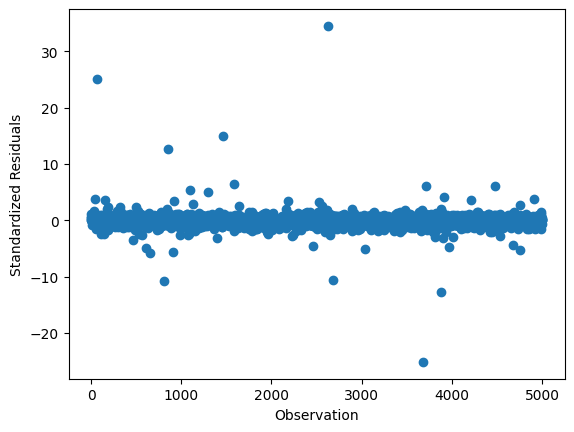

In [21]:
plt.scatter(range (len(residuals)), residuals)
plt.xlabel('Observation')
plt.ylabel('Standardized Residuals')

By using the ACF plot,  we can check the independence of the residuals where the data seems to be near zero, which we can determine them to be independent. 

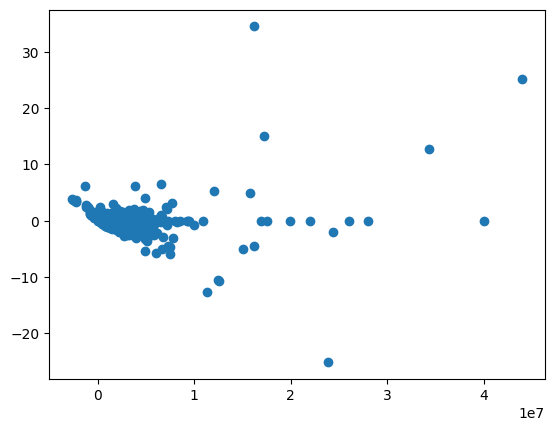

In [22]:
plt.scatter(full_model.fittedvalues, standardize(full_model.resid))

By checking teh homoscedastivity with plotting the residuals against the fitted values, we can most of the data are concentrated on the y=0 but still do not see any pattern of the whole graph.

In [24]:
from statsmodels.stats.diagnostic import het_breuschpagan

p_values = het_breuschpagan(full_model.resid, full_model.model.exog)[3]
print(p_values)

5.9270617709504e-20


As finding the p-value from the Breusch-Pagan test, we can see it also violate the rule of homoscedasticity. 